In [1]:
import simulationlib as sl
%matplotlib widget
import annealing_database2 as adb2

import numpy as np
import matplotlib.pyplot as plt
import os


print(os.getcwd())


DBPATH = r".\annealing records\50um Al ASB New Database\50um Al ASB.dill"
FIGPATH = r".\figures"
database = adb2.DatabaseWrapper(DBPATH)

C:\Users\ssuub\Desktop\Damage analysis\EDET80k_Damage\Lasing Analysis\apps\Simulation and BeamLib


In [2]:
def power_profile(entry, polling=0.1):
    seq = entry.sequence
    tstop = seq.duration
    times = np.arange(0, tstop, polling)
    y = []
    for t in times:
        pulse_active = False
        for p in seq.pulses:
            result = p.run(t)
            if result is not None:
                y.append(p.modulate_beam(t) * p.power)
                pulse_active = True
                break
        if not pulse_active:
            y.append(0)
                
    return times, y
    

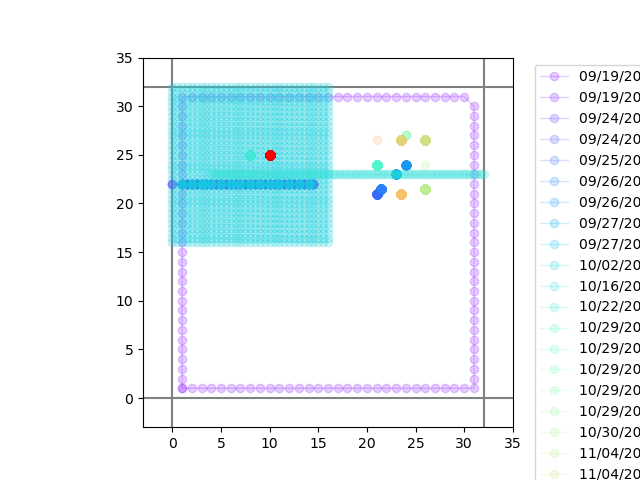

In [3]:
database.visualize()
record = database.get_record()
data = database.load_entries()

In [4]:
for ID, entry in record:
    print(ID)
    print(entry)

9b01f42e293ea60de7bf85114278196a
09/19/2024, 17:11:38
Annealing cycle: LaserSequence(['Pulse(6.000W, 0.000 + 0.030S -> 0.030NOMOD)', 'Pulse(6.000W, 0.230 + 0.030S -> 0.260NOMOD)', 'Pulse(6.000W, 0.460 + 0.030S -> 0.490NOMOD)', 'Pulse(6.000W, 0.690 + 0.030S -> 0.720NOMOD)', 'Pulse(6.000W, 0.920 + 0.030S -> 0.950NOMOD)', 'Pulse(6.000W, 1.150 + 0.030S -> 1.180NOMOD)', 'Pulse(6.000W, 1.380 + 0.030S -> 1.410NOMOD)', 'and 114 additional pulse(s).'])
d3192212c38b2819b4ccf43d8299cc9c
09/19/2024, 18:11:12
Annealing cycle: LaserSequence(['Pulse(6.000W, 0.000 + 1.000S -> 1.000NOMOD)', 'Pulse(6.000W, 6.000 + 1.000S -> 7.000NOMOD)', 'Pulse(6.000W, 12.000 + 1.000S -> 13.000NOMOD)', 'Pulse(6.000W, 18.000 + 1.000S -> 19.000NOMOD)', 'Pulse(6.000W, 24.000 + 1.000S -> 25.000NOMOD)', 'Pulse(6.000W, 30.000 + 1.000S -> 31.000NOMOD)', 'Pulse(6.000W, 36.000 + 1.000S -> 37.000NOMOD)', 'and 54 additional pulse(s).'])
144bae7c866ddae199652f191c50a8c7
09/24/2024, 17:32:35
Annealing cycle: edge test 2, 1-14.5mm 28

In [8]:
PULSE_ID = "4fbbac98d4908f9bbb4f7a00b6dc4583"

entry = data[PULSE_ID]

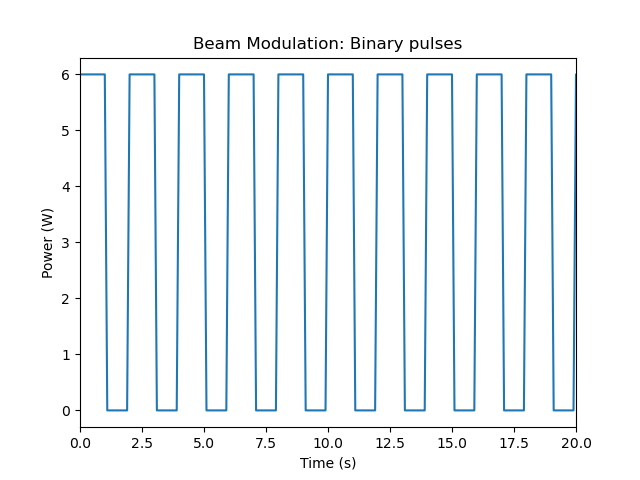

In [6]:
times, power = power_profile(entry)

name = "Binary pulses"

plt.close(1)
fig1, ax1 = plt.subplots(num=1)

ax1.set_title(f"Beam Modulation: {name}")
ax1.plot(times, power)
ax1.set_xlim(0, 20)
ax1.set_ylabel("Power (W)")
ax1.set_xlabel("Time (s)")

fig1.savefig(fname=f"{FIGPATH}\{name}.png")


plt.show()